In [1]:
pima=pd.read_csv("data/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
pima.astype('float')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


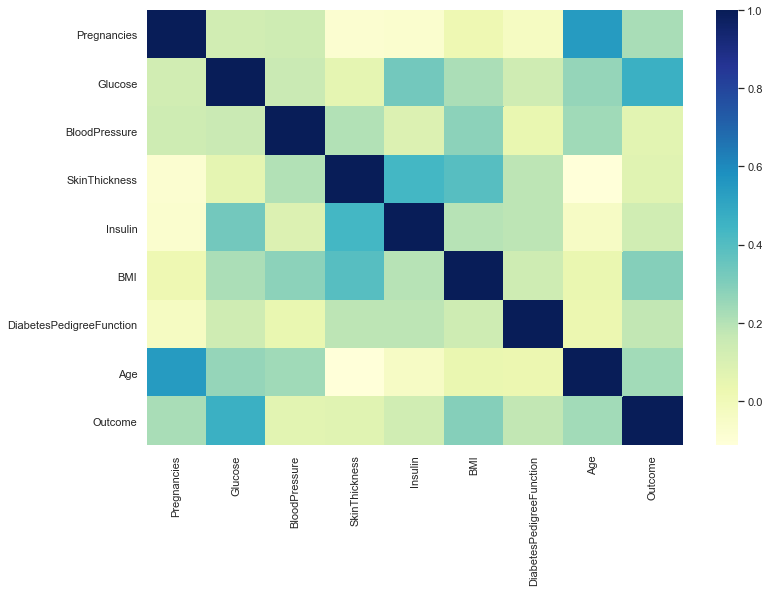

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(pima.corr() , cmap='YlGnBu')
plt.show()

In [5]:
(pima==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
zero_features = ["Glucose", "BloodPressure",'SkinThickness','BMI']
pima[zero_features] = pima[zero_features].replace(0, pima[zero_features].mean())
(pima==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X=pima.drop(['Outcome'], axis=1)
y=pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =13, stratify = y)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimator=[('scaler', StandardScaler()), ('clf',LogisticRegression(solver='liblinear', random_state=13) )]

pipe_lr = Pipeline(estimator)
pipe_lr.fit(X_train, y_train)
pred=pipe_lr.predict(X_test)

In [23]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print(accuracy_score(y_test, pred), recall_score(y_test, pred), precision_score(y_test, pred), roc_auc_score(y_test, pred), f1_score(y_test, pred))

0.7727272727272727 0.6111111111111112 0.7021276595744681 0.7355555555555556 0.6534653465346535


In [31]:
coeff = list(pipe_lr['clf'].coef_[0])
labels =list(X_train.columns)
coeff

[0.3542658884412649,
 1.201424442503758,
 -0.15840135536286715,
 0.033946577129299486,
 -0.16286471953988116,
 0.6204045219895111,
 0.3666935579557874,
 0.17195965447035108]

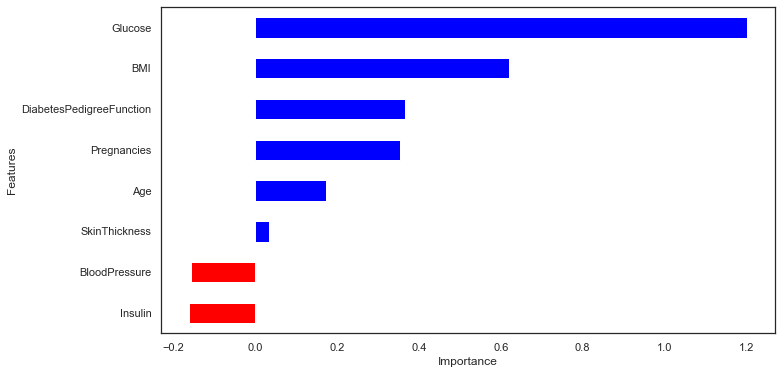

In [33]:
features = pd.DataFrame({'Features':labels, 'importance':coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh', figsize=(11,6), color=features['positive'].map({
    True:'Blue', False:'red'
}))
plt.xlabel("Importance")
plt.show()